In [1]:
import sys
sys.path.append('../src/')
from node import Node
from rdr import RDR

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

KeyboardInterrupt: 

In [ ]:
df_train = pd.read_csv("../dataset/zoo.csv")
df_train = df_train[["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "tail", "domestic", "catsize"]]

df_test = pd.read_csv("../dataset/zoo2.csv")
df_test = df_test[["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "tail", "domestic", "catsize"]]

df_test2 = pd.read_csv("../dataset/zoo3.csv")
df_test2 = df_test2[["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "tail", "domestic", "catsize"]]

In [ ]:
features = ["hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "tail", "domestic", "catsize"]
X_train = df_train[features]
y_train = df_train[["animal_name"]]

X_test = df_test[features]
y_test = df_test[["animal_name"]]

X_test2 = df_test2[features]
y_test2 = df_test2[["animal_name"]]


In [ ]:
# show the not unique value
df_train[df_train.duplicated(subset=["animal_name"], keep=False)]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, X_test.shape, X_test2.shape, y_train.shape, y_test.shape, y_test2.shape

((101, 15), (86, 15), (35, 15), (101, 1), (86, 1), (35, 1))

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array(['aardvark', 'antelope', 'bass', 'aardvark', 'boar', 'antelope',
       'calf', 'carp', 'bass', 'cavy', 'boar', 'chicken', 'bass', 'clam',
       'crab', 'crab', 'crow', 'antelope', 'gull', 'haddock', 'hamster',
       'hare', 'crow', 'bass', 'honeybee', 'housefly', 'kiwi', 'ladybird',
       'lark', 'boar', 'boar', 'crab', 'boar', 'mink', 'mole', 'boar',
       'housefly', 'newt', 'octopus', 'mole', 'antelope', 'ostrich',
       'chicken', 'penguin', 'lark', 'dogfish', 'bass', 'pitviper',
       'platypus', 'boar', 'calf', 'dolphin', 'boar', 'pussycat', 'boar',
       'calf', 'rhea', 'scorpion', 'haddock', 'seal', 'sealion',
       'seasnake', 'seawasp', 'gull', 'gull', 'slowworm', 'flea',
       'haddock', 'lark', 'hare', 'crab', 'stingray', 'swan', 'flea',
       'toad', 'tortoise', 'slowworm', 'dogfish', 'fruitbat', 'hare',
       'vulture', 'antelope', 'wasp', 'boar', 'flea', 'lark'],
      dtype=object)

In [ ]:
clf.predict(X_test2)

array(['dolphin', 'boar', 'pussycat', 'boar', 'calf', 'rhea', 'scorpion',
       'haddock', 'seal', 'sealion', 'seasnake', 'seawasp', 'gull',
       'gull', 'slowworm', 'flea', 'haddock', 'lark', 'hare', 'crab',
       'stingray', 'swan', 'flea', 'toad', 'tortoise', 'slowworm',
       'dogfish', 'fruitbat', 'hare', 'vulture', 'antelope', 'wasp',
       'boar', 'flea', 'lark'], dtype=object)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4883720930232558


In [ ]:
rdr = RDR(antecedent="human", categorical_attr=features)
rdr.fit(X_test, pd.DataFrame(y_pred))
print(rdr)

>> [None] -> human | Cornerstone: {}
    T>> [{}] -> aardvark | Cornerstone: {'hair': 1, 'feathers': 0, 'eggs': 0, 'milk': 1, 'airborne': 0, 'aquatic': 0, 'predator': 1, 'toothed': 1, 'backbone': 1, 'breathes': 1, 'venomous': 0, 'fins': 0, 'tail': 0, 'domestic': 0, 'catsize': 1}
        T>> [{'predator': 0, 'tail': 1}] -> antelope | Cornerstone: {'hair': 1, 'feathers': 0, 'eggs': 0, 'milk': 1, 'airborne': 0, 'aquatic': 0, 'predator': 0, 'toothed': 1, 'backbone': 1, 'breathes': 1, 'venomous': 0, 'fins': 0, 'tail': 1, 'domestic': 0, 'catsize': 1}
            T>> [{'domestic': 1}] -> calf | Cornerstone: {'hair': 1, 'feathers': 0, 'eggs': 0, 'milk': 1, 'airborne': 0, 'aquatic': 0, 'predator': 0, 'toothed': 1, 'backbone': 1, 'breathes': 1, 'venomous': 0, 'fins': 0, 'tail': 1, 'domestic': 1, 'catsize': 1}
                T>> [{'hair': 0, 'eggs': 1, 'milk': 0, 'aquatic': 1, 'breathes': 0, 'fins': 1, 'catsize': 0}] -> carp | Cornerstone: {'hair': 0, 'feathers': 0, 'eggs': 1, 'milk': 0, 'airbor

In [ ]:
# predict with RDR
rdr_pred = rdr.predict(X_test)
rdr_pred

array(['aardvark', 'antelope', 'bass', 'aardvark', 'boar', 'antelope',
       'calf', 'carp', 'bass', 'cavy', 'boar', 'chicken', 'bass', 'clam',
       'crab', 'crab', 'crow', 'antelope', 'gull', 'haddock', 'hamster',
       'hare', 'crow', 'bass', 'honeybee', 'housefly', 'kiwi', 'ladybird',
       'lark', 'boar', 'boar', 'crab', 'boar', 'mink', 'mole', 'boar',
       'housefly', 'newt', 'octopus', 'mole', 'antelope', 'ostrich',
       'chicken', 'penguin', 'lark', 'dogfish', 'bass', 'pitviper',
       'platypus', 'boar', 'calf', 'dolphin', 'boar', 'pussycat', 'boar',
       'calf', 'rhea', 'scorpion', 'haddock', 'seal', 'sealion',
       'seasnake', 'seawasp', 'gull', 'gull', 'slowworm', 'flea',
       'haddock', 'lark', 'hare', 'crab', 'stingray', 'swan', 'flea',
       'toad', 'tortoise', 'slowworm', 'dogfish', 'fruitbat', 'hare',
       'vulture', 'antelope', 'wasp', 'boar', 'flea', 'lark'],
      dtype='<U32')

In [ ]:
# check if y_pred and rdr.predict is the same
metrics.accuracy_score(y_pred, rdr_pred)

1.0

In [ ]:
rdr.predict(X_test2)

array(['dolphin', 'boar', 'pussycat', 'boar', 'calf', 'rhea', 'scorpion',
       'haddock', 'seal', 'sealion', 'seasnake', 'seawasp', 'gull',
       'gull', 'slowworm', 'flea', 'haddock', 'lark', 'hare', 'crab',
       'stingray', 'swan', 'flea', 'toad', 'tortoise', 'slowworm',
       'dogfish', 'fruitbat', 'hare', 'vulture', 'antelope', 'wasp',
       'boar', 'flea', 'lark'], dtype='<U32')

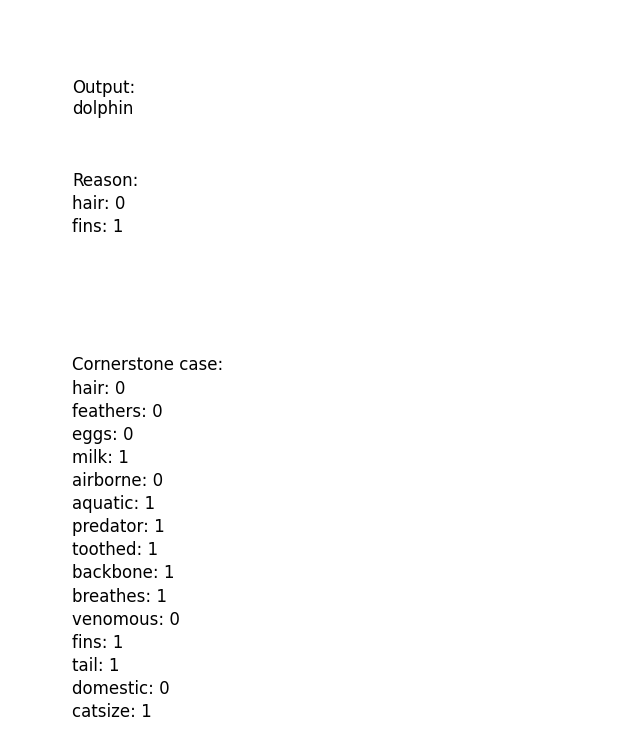

('dolphin',
 {'hair': 0, 'fins': 1},
 {'hair': 0,
  'feathers': 0,
  'eggs': 0,
  'milk': 1,
  'airborne': 0,
  'aquatic': 1,
  'predator': 1,
  'toothed': 1,
  'backbone': 1,
  'breathes': 1,
  'venomous': 0,
  'fins': 1,
  'tail': 1,
  'domestic': 0,
  'catsize': 1})

In [ ]:
rdr.explain_instance(X_test2.iloc[0])